In [1]:
import numpy as np
import math

mean = (0, 0)
cov = [[1, 0.5], [0.5, 1]]
u_v = np.random.multivariate_normal(mean, cov, (1000, 10))

In [2]:
u = np.empty((1000,10))
v = np.empty((1000,10))
for i in range(1000):
    for j in range(10):
        u[i][j] = u_v[i][j][0]
        v[i][j] = u_v[i][j][1]

In [3]:
# create and rescale w
w = np.random.normal(0, 1, (1000, 10))
for i in range(1000):
    a = w[i].T.dot(w[i])
    w[i] = w[i]*math.sqrt(10)/math.sqrt(a)

In [4]:
x = np.empty((1000,10))
y = np.empty((1000,10))
for i in range(1000):
    x[i] = w[i] + v[i]
    y[i] = u[i]

In [5]:
beta_hat = np.empty(1000)
for i in range(1000):
    b = (w[i].T.dot(y[i]))/(w[i].T.dot(x[i]))
    beta_hat[i] = b

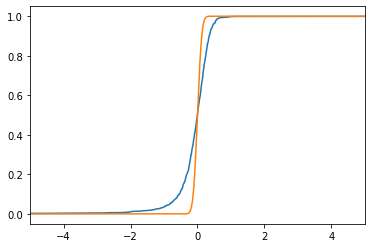

In [12]:
from matplotlib import pyplot
import statsmodels.distributions.empirical_distribution as st
import scipy.stats as stats
ecdf = st.ECDF(beta_hat)
pyplot.plot(ecdf.x, ecdf.y)
pyplot.xlim([-5, 5])

x1 = np.linspace(-5, 5, 5000)
pyplot.plot(x1, stats.norm.cdf(x1, 0, 1/10))

pyplot.show()

In [7]:
import pandas as pd
from statsmodels.formula.api import ols
df = pd.DataFrame(data={'y': y[0], 'x': x[0]})
betas = []
for i in range(1000):
    df.y = y[i]
    df.x = x[i]
    fit = ols('y ~ x -1', data=df).fit()
    betas.append(fit.params[0])

In [8]:
betas = np.array(betas)

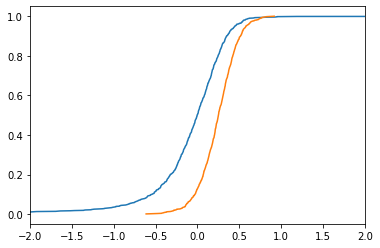

In [14]:
# IV estimator dirstibution
ecdf1 = st.ECDF(beta_hat)
# regular OLS esimator distribution 
ecdf2 = st.ECDF(betas)

pyplot.plot(ecdf1.x, ecdf1.y)
pyplot.plot(ecdf2.x, ecdf2.y)
pyplot.xlim([-2, 2])

pyplot.show()

In [10]:
# create s and rescale
s = np.random.normal(0, 1, (1000, 10))
for i in range(1000):
    a = s[i].T.dot(s[i])
    s[i] = s[i]*math.sqrt(10)/math.sqrt(a)